In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-market-sales/Orders.xlsx
/kaggle/input/global-market-sales/Shippings.xlsx
/kaggle/input/global-market-sales/FactMarketSales.xlsx
/kaggle/input/global-market-sales/Products.xlsx


# Introduction
Greetings! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. Click the blue "Edit Notebook" or "Fork Notebook" button at the top of this kernel to begin editing.
In this section we will do some exploratory analysis and regressive linear analysis by using global-market-sales data. This dataset consists of four files which are related one to another by particular columns. We will start to compile one to another and see the track record of the company from these data and at the end we will try to create a regression linear analysis for some variables within this dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

set the figure size for the seaborn graphic. 

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# **Import the Data**

In [4]:
factmarketsales = pd.read_excel('../input/global-market-sales/FactMarketSales.xlsx')
orders = pd.read_excel('../input/global-market-sales/Orders.xlsx')
products = pd.read_excel('../input/global-market-sales/Products.xlsx')
shippings = pd.read_excel('../input/global-market-sales/Shippings.xlsx')

Compile all Data in Dataset with the OrderCode and ProductId as the key for the merging

In [5]:
df_all = factmarketsales.merge(orders,on='OrderCode').merge(products,on='ProductId').merge(shippings,on='OrderCode')
df_all.head(5)

,OrderCode,ProductId,ShipKey_x,Cust_id,Sales,Quantity,Discount,Profit,Shipping Cost,OrderKey,OrderPriority,OrderDate,ProductKey,Category,SubCategory,ProductName,ShipKey_y,ShipMode,ShipDate,ShippingRegion
0,Ord_1,1,1,Cust_1818,408.300,2,0.0,106.140,35.46,1,Medium,2011-01-01 00:00:00,1,Office Supplies,Storage,"Tenex Lockers, Blue",1,Standard Class,2011-06-01 00:00:00,Africa
1,Ord_2,2,2,Cust_1818,120.366,3,0.1,36.036,9.72,2,Medium,2011-01-01 00:00:00,2,Office Supplies,Supplies,"Acme Trimmer, High Speed",2,Standard Class,2011-08-01 00:00:00,Oceania
2,Ord_3,3,3,Cust_1818,66.120,4,0.0,29.640,8.17,3,High,2011-01-01 00:00:00,3,Office Supplies,Storage,"Tenex Box, Single Width",3,Second Class,2011-05-01 00:00:00,EMEA
3,Ord_4,4,4,Cust_1818,44.865,3,0.5,-26.055,4.82,4,High,2011-01-01 00:00:00,4,Office Supplies,Storage,Product SCD test1,4,Second Class,2011-05-01 00:00:00,North
4,Ord_5,5,5,Cust_1818,113.670,5,0.1,37.770,4.70,5,Medium,2011-01-01 00:00:00,5,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",5,Standard Class,2011-08-01 00:00:00,Oceania


# Gain some graphical insight

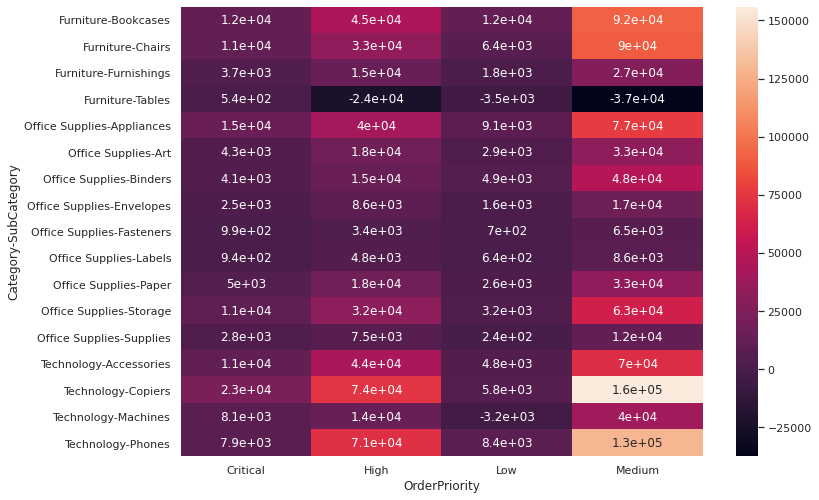

In [6]:
#heatmap of the profit by sub category
df_pivot = df_all.pivot_table(values='Profit',index=['Category','SubCategory'],columns='OrderPriority',aggfunc='sum')
sns.heatmap(df_pivot,annot=True)

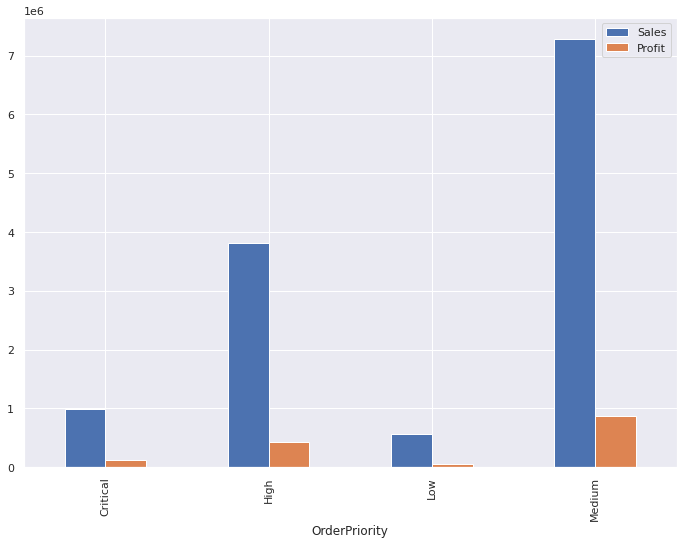

In [7]:
#bar cart for the sales and profit for each order priority
by_priority = df_all.groupby(['OrderPriority']).sum()[['Sales','Profit']]
by_priority.plot(kind='bar')

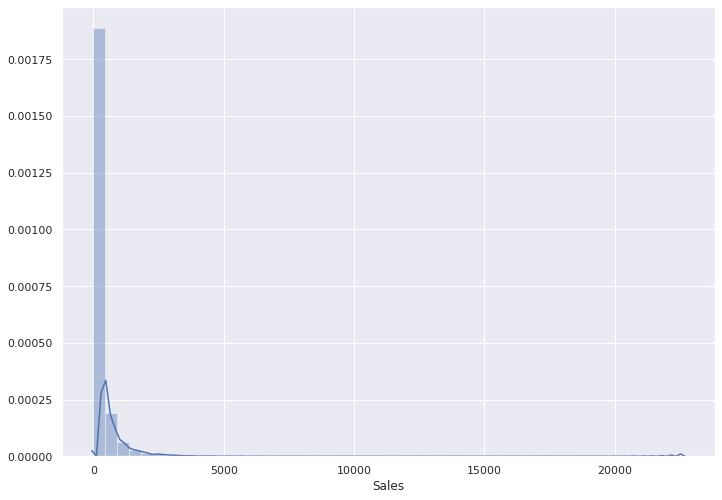

In [8]:
#distribution plot of sales
sns.distplot(df_all['Sales'])

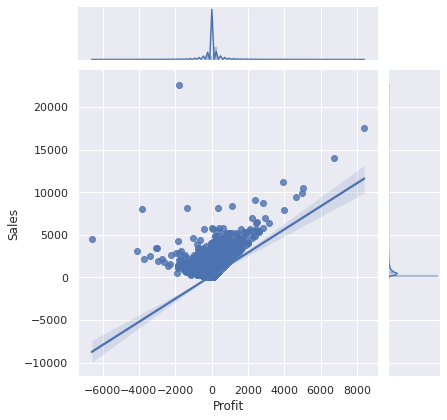

In [9]:
#jointplot between saes and profit
sns.jointplot(data=df_all,x='Profit',y='Sales',kind='reg')

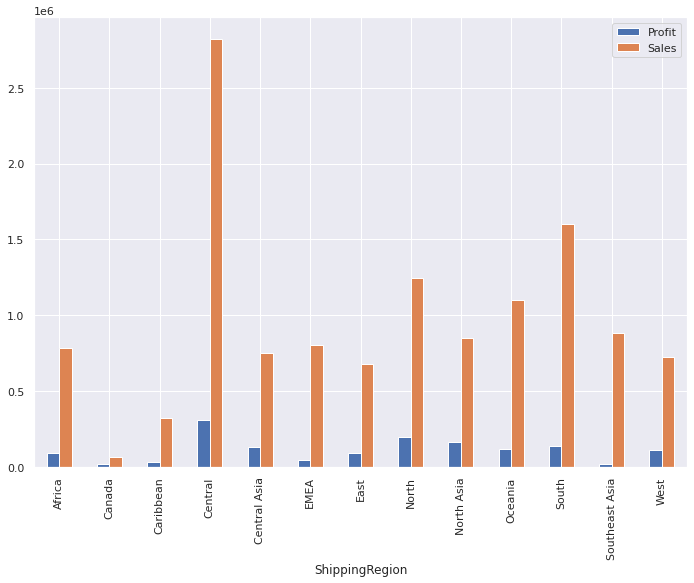

In [10]:
#Profit and sales value by shipping region
by_region = df_all.groupby(['ShippingRegion']).sum()[['Profit','Sales']]
by_region.plot(kind='bar')

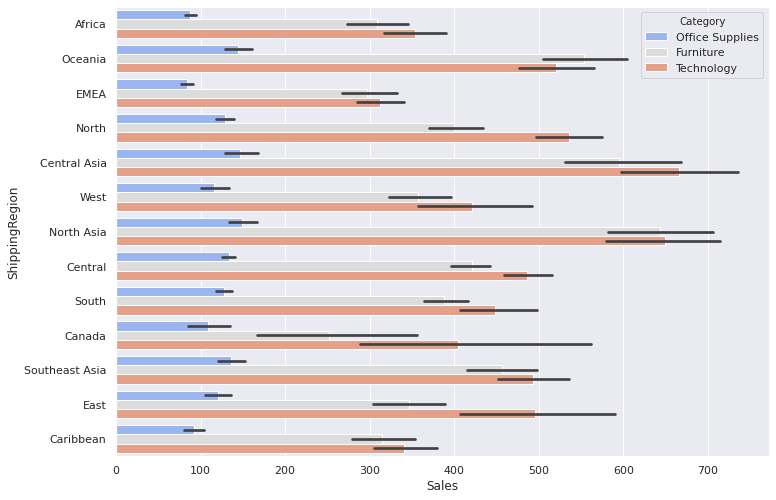

In [11]:
#number of sales divided by region for each category
sns.barplot(x="Sales", y="ShippingRegion", hue="Category",data=df_all, palette="coolwarm")

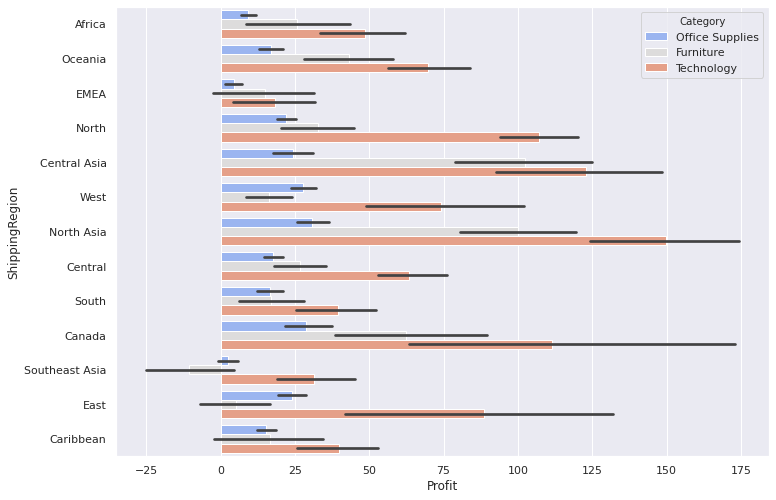

In [12]:
#amount of profit obtained by region for each category
sns.barplot(x="Profit", y="ShippingRegion", hue="Category",data=df_all, palette="coolwarm")

# Start linear regression analysis

In [13]:
#X and y arrays
X = df_all[['Sales','Shipping Cost','Discount']]
y = df_all['Profit']

**Train Test Split**

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Creating and Training the Model**

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

# Model Evaluation

Below are the coefficients that represent correlation between profit, shipping cost and dicount variable.

In [18]:
print(lm.intercept_)

20.51108828749114


In [19]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Sales,0.179364
Shipping Cost,-0.112111
Discount,-229.346475


# Prediction from Our Model

In [20]:
predictions = lm.predict(X_test)

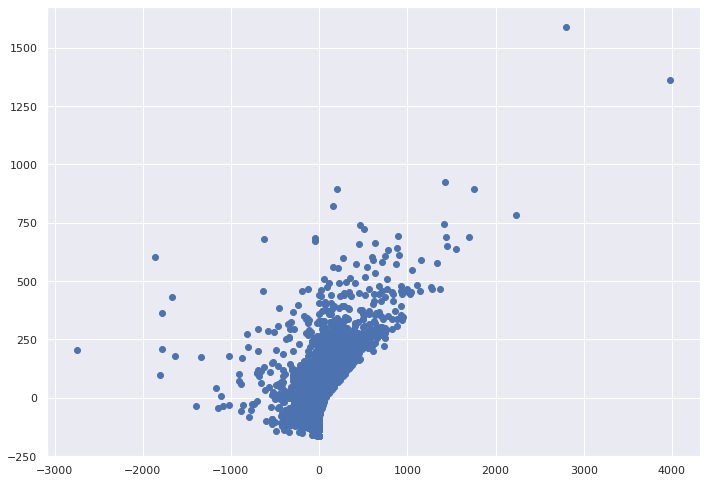

In [21]:
plt.scatter(y_test,predictions)

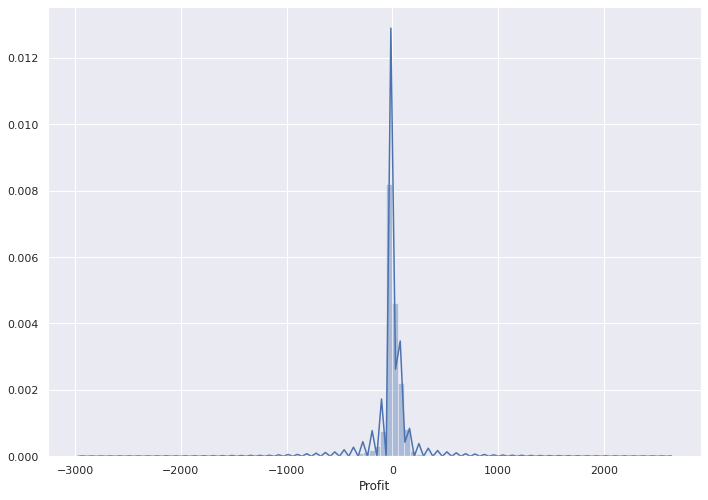

In [22]:
sns.distplot((y_test-predictions),bins=100);

# Regression Evaluation Metric

In [23]:
from sklearn import metrics

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 57.68717374573942
MSE: 16483.280870238043
RMSE: 128.38723016810528
